<a href="https://colab.research.google.com/github/reshmaessudhakaran/AnomalyDetection_python/blob/main/OneHotEncoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Input, Dense
from keras.models import Model
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load your dataset
# For this example, let's assume you have a dataset called 'restaurant_data.csv'
data = pd.read_csv('/content/drive/MyDrive/DatasetXTG/order_data_1.csv')

In [ ]:
data.head()


,Order ID,Timestamp,Menu Items Ordered,Quantity,Price,Total Amount
0,ORD_1,3/1/2024 0:02,Chinese Food,1,1.72,5.22
1,ORD_1,3/1/2024 0:02,Pasta,2,1.00,5.22
2,ORD_1,3/1/2024 0:02,Muffin,1,1.50,5.22
3,ORD_2,3/1/2024 5:30,Orange Juice,1,1.65,1.65
4,ORD_3,3/1/2024 9:38,Orange Juice,4,3.04,12.16


In [ ]:
# Aggregate quantity and calculate mean price for each food item
data_agg = data.groupby('Menu Items Ordered').agg({'Quantity':'sum', 'Price':'mean'}).reset_index()


In [ ]:
# Preprocessing
# One-hot encode food items
encoder = OneHotEncoder(sparse=False)
food_items_encoded = encoder.fit_transform(data_agg['Menu Items Ordered'].values.reshape(-1, 1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
food_items_encoded

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
# Standardize numerical features (quantity and price)
scaler = StandardScaler()
numerical_features = scaler.fit_transform(data_agg[['Quantity', 'Price']])

In [ ]:
numerical_features

array([[ 0.95253926,  0.08876191],
       [ 0.73580982,  0.13547882],
       [ 0.93648523,  0.39852116],
       [-1.11040391, -0.69108546],
       [-1.15053899, -2.27742094],
       [ 0.80805297,  0.40169708],
       [-1.07026883, -0.11891483],
       [-1.12645795,  1.68236305],
       [ 1.02478241,  0.3805992 ]])

In [ ]:

# Concatenate one-hot encoded food items and numerical features
X = np.concatenate((food_items_encoded, numerical_features), axis=1)

In [ ]:
X

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.95253926,
         0.08876191],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.73580982,
         0.13547882],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.93648523,
         0.39852116],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -1.11040391,
        -0.69108546],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        , -1.15053899,
        -2.27742094],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.80805297,
         0.401

In [ ]:

# Split data into train and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [ ]:
X_test

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        , -1.12645795,
         1.68236305],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.73580982,
         0.13547882]])

In [ ]:
# Autoencoder architecture
input_dim = X_train.shape[1]
encoding_dim = 32  # adjust the size of the encoding layer


In [ ]:
input_layer = Input(shape=(input_dim,))
encoder_layer = Dense(encoding_dim, activation='relu')(input_layer)
decoder_layer = Dense(input_dim, activation='sigmoid')(encoder_layer)

autoencoder = Model(input_layer, decoder_layer)

In [ ]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=64, shuffle=True, validation_data=(X_test, X_test))


Epoch 1/50
1/1 [==============================] - 1s 648ms/step - loss: 0.4496 - val_loss: 0.4701
Epoch 2/50
1/1 [==============================] - 0s 38ms/step - loss: 0.4474 - val_loss: 0.4691
Epoch 3/50
1/1 [==============================] - 0s 38ms/step - loss: 0.4452 - val_loss: 0.4681
Epoch 4/50
1/1 [==============================] - 0s 34ms/step - loss: 0.4430 - val_loss: 0.4672
Epoch 5/50
1/1 [==============================] - 0s 34ms/step - loss: 0.4408 - val_loss: 0.4663
Epoch 6/50
1/1 [==============================] - 0s 35ms/step - loss: 0.4387 - val_loss: 0.4653
Epoch 7/50
1/1 [==============================] - 0s 36ms/step - loss: 0.4366 - val_loss: 0.4644
Epoch 8/50
1/1 [==============================] - 0s 35ms/step - loss: 0.4345 - val_loss: 0.4635
Epoch 9/50
1/1 [==============================] - 0s 35ms/step - loss: 0.4324 - val_loss: 0.4625
Epoch 10/50
1/1 [==============================] - 0s 37ms/step - loss: 0.4303 - val_loss: 0.4616
Epoch 11/50
1/1 [===========

In [ ]:

# Reconstruction errors
train_reconstructions = autoencoder.predict(X_train)
train_errors = np.mean(np.square(X_train - train_reconstructions), axis=1)
test_reconstructions = autoencoder.predict(X_test)
test_errors = np.mean(np.square(X_test - test_reconstructions), axis=1)

1/1 [==============================] - 0s 39ms/step


In [ ]:

# Define threshold for anomaly detection
threshold = np.mean(train_errors) + 3 * np.std(train_errors)


In [ ]:
# Calculate the 95th percentile of the reconstruction errors
threshold_train = np.percentile(train_errors, 95)

# Alternatively, you can calculate it using the test errors if you prefer:
threshold_test = np.percentile(test_errors, 95)

In [ ]:
threshold

0.7482149054646285

In [ ]:

# Detect anomalies
anomalies_train = X_train[train_errors > threshold_train]
anomalies_test = X_test[test_errors > threshold_test]

In [ ]:
anomalies_train

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        , -1.15053899,
        -2.27742094]])

In [ ]:
anomalies_test

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        , -1.12645795,
         1.68236305]])

In [ ]:

print("Anomalies detected in training set:", anomalies_train.shape[0])
print("Anomalies detected in test set:", anomalies_test.shape[0])

Anomalies detected in training set: 1
Anomalies detected in test set: 1


In [ ]:
# Get indices of anomalies in the aggregated dataset
anomaly_indices_train = np.where(train_errors < threshold_train)[0]
anomaly_indices_test = np.where(test_errors > threshold_test)[0]

# Get corresponding anomalies from the aggregated dataset
anomalies_aggregated_train = data_agg.iloc[anomaly_indices_train]
anomalies_aggregated_test = data_agg.iloc[anomaly_indices_test]

# Display anomaly data from the aggregated dataset for the training set
print("Anomalies detected in training set (aggregated dataset):\n", anomalies_aggregated_train)

# Display anomaly data from the aggregated dataset for the test set
print("Anomalies detected in test set (aggregated dataset):\n", anomalies_aggregated_test)

Anomalies detected in training set (aggregated dataset):
   Menu Items Ordered  Quantity     Price
0               Cake       263  5.408000
1       Chinese Food       236  5.485158
2             Coffee       261  5.919600
3         Lemon Rice         6  4.120000
5       Orange Juice       245  5.924845
6              Pasta        11  5.065000
Anomalies detected in test set (aggregated dataset):
   Menu Items Ordered  Quantity  Price
0               Cake       263  5.408


In [ ]:
anomalies_all

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        , -1.15053899,
        -2.27742094],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        , -1.12645795,
         1.68236305]])

In [ ]:
menu_items = anomalies_aggregated_train['Menu Items Ordered']
menu_items

0            Cake
1    Chinese Food
2          Coffee
3      Lemon Rice
5    Orange Juice
6           Pasta
Name: Menu Items Ordered, dtype: object

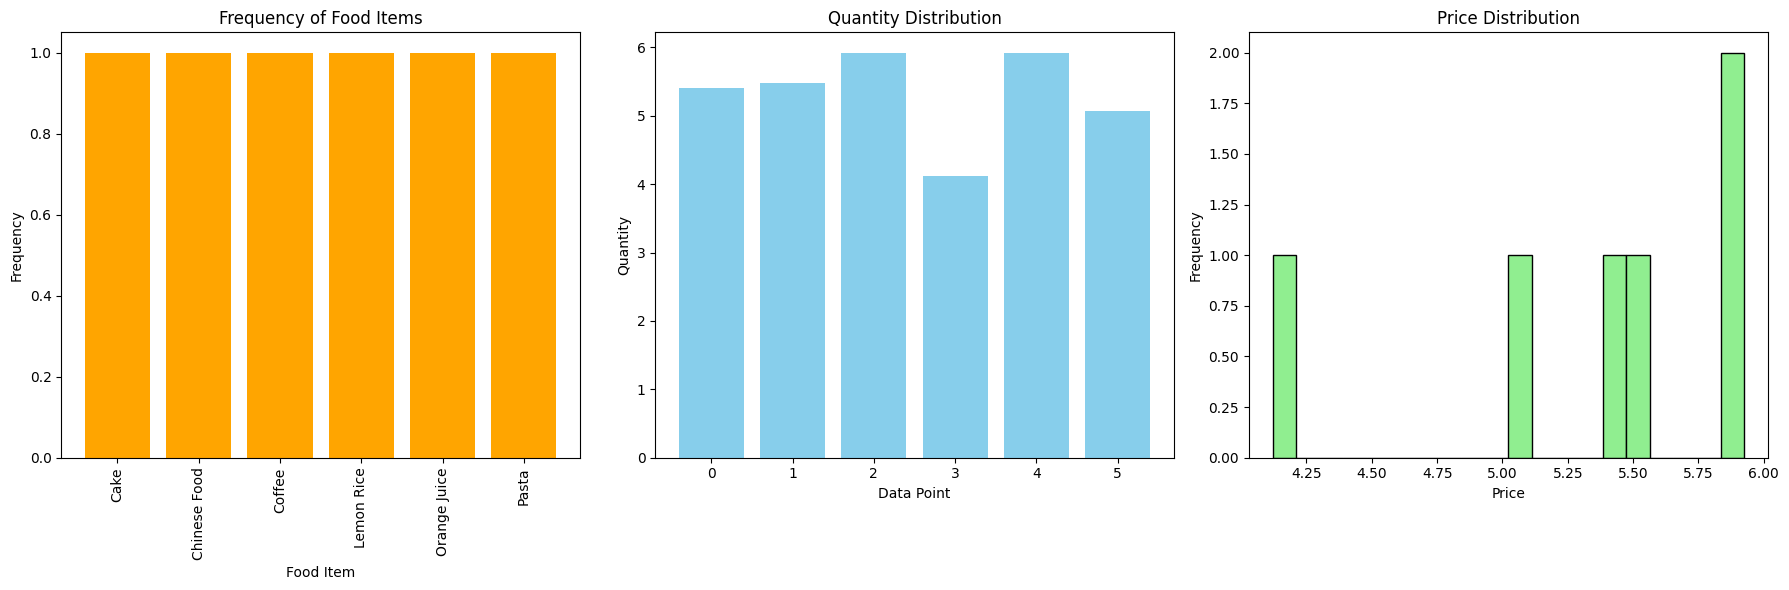

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter



# Assuming anomalies_all contains menu items, quantity, and price
food_items = anomalies_aggregated_train['Menu Items Ordered']  # Extract menu items (assuming it's in the first column)
quantity = anomalies_aggregated_train['Quantity']   # Extract quantity (assuming it's in the second column)
price = quantity = anomalies_aggregated_train['Price']   # Extract quantity (assuming it's in the second column)
            # Assuming price is the feature after quantity



# Calculate the frequency of each food item
food_item_counts = Counter(food_items)

# Plotting all three graphs horizontally without overlap using subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot a bar graph for food items
axs[0].bar(food_item_counts.keys(), food_item_counts.values(), color='orange')
axs[0].set_xlabel('Food Item')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Frequency of Food Items')
axs[0].tick_params(axis='x', rotation=90)

# Plot a bar graph for quantity
axs[1].bar(range(len(quantity)), quantity, color='skyblue')
axs[1].set_xlabel('Data Point')
axs[1].set_ylabel('Quantity')
axs[1].set_title('Quantity Distribution')

# Plot a histogram for price
axs[2].hist(price, bins=20, color='lightgreen', edgecolor='black')
axs[2].set_xlabel('Price')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Price Distribution')

plt.tight_layout()
plt.show()

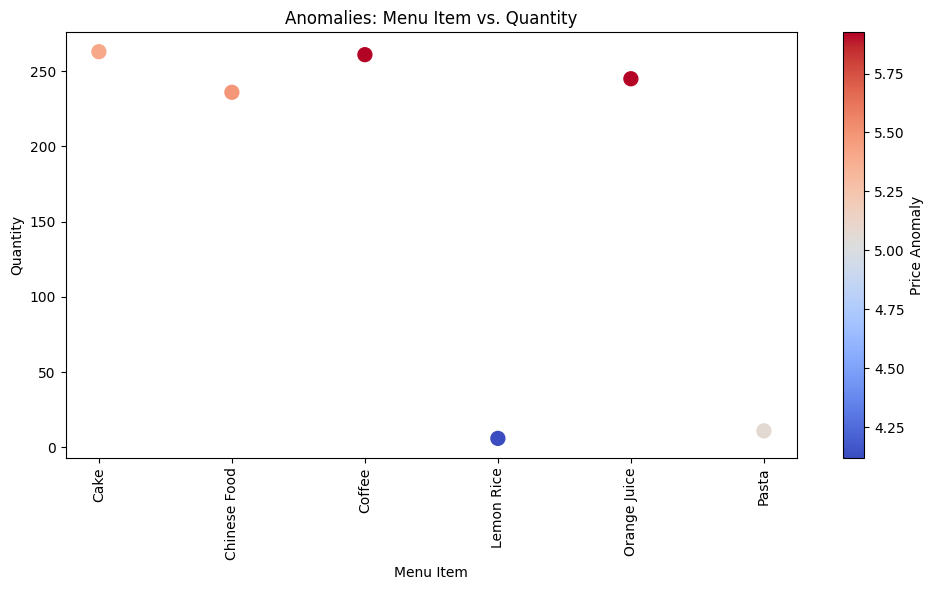

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'anomalies_aggregated_train' is your DataFrame containing aggregated anomalies
# Assuming 'menu_items', 'quantity', and 'price' are columns in 'anomalies_aggregated_train'


from collections import Counter



# Assuming anomalies_all contains menu items, quantity, and price
food_items = anomalies_aggregated_train['Menu Items Ordered']  # Extract menu items (assuming it's in the first column)
quantity = anomalies_aggregated_train['Quantity']   # Extract quantity (assuming it's in the second column)
price = quantity = anomalies_aggregated_train['Price']   # Extract quantity (assuming it's in the second column)
            # Assuming price is the feature after quantity



# Calculate the frequency of each food item
food_item_counts = Counter(food_items)

# Plot anomalies with menu item, quantity, and price
plt.figure(figsize=(10, 6))

# Scatter plot for menu item vs. quantity with price anomaly indicated by color
plt.scatter(anomalies_aggregated_train['Menu Items Ordered'], anomalies_aggregated_train['Quantity'],
            c=anomalies_aggregated_train['Price'], cmap='coolwarm', s=100)
plt.xlabel('Menu Item')
plt.ylabel('Quantity')
plt.title('Anomalies: Menu Item vs. Quantity')
plt.colorbar(label='Price Anomaly')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
